# Assignement 2

### <span style="color:chocolate"> Submission requirements </span>

Your homework will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:

    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).
---

### Import libraries

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Define functions

In [8]:
def create_1d_data(num_examples, w, b, bound):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    bound: lower and upper boundary of the data interval

  Returns:
    X and Y with shape (num_examples)
  """
  np.random.seed(4)  # consistent random number generation
  X = np.arange(num_examples)
  deltas = np.random.uniform(low=-bound, high=bound, size=X.shape) # added noise
  Y = b + deltas + w * X

  return X, Y

---
### Step 1: Data ingestion

Let's start by creating some artificial data using the <span style="color:chocolate">create_1d_data()</span> function defined at the top of the notebook.

In [9]:
# Define parameters
num_examples = 70
w = 2
b = 1
bound = 1

# Create data
X, Y = create_1d_data(num_examples, w, b, bound)

# Print shapes
print('Printing shape of X:', X.shape)
print('Printing first 10 elements in X:', X[:10])
print('\nPrinting shape of Y:', Y.shape)
print('Printing first 10 elements in Y:', Y[:10])

Printing shape of X: (70,)
Printing first 10 elements in X: [0 1 2 3 4 5 6 7 8 9]

Printing shape of Y: (70,)
Printing first 10 elements in Y: [ 1.93405968  3.0944645   5.94536872  7.42963199  9.39545765 10.43217899
 13.95254891 14.01246051 16.50596472 18.86958306]


---
### Step 2: Data Preprocessing

Our objectives here involve adding one more feature to X and creating data partitions.

### <span style="color:chocolate">Exercise 1:</span> Adding features (10 points)

1. Add a column of $1s$ to $X$ (this will serve as an intercept or "bias" in our modeling task later on). Note: do not create a new array, just concatenate with the current values;
2. Print the shape of the array.

In [10]:
# YOUR CODE HERE

# Adding a column of 1s to X using stack
X = np.stack((np.ones(len(X)), X), axis = 1)

# Printing shape of the array
print('Printing shape of X:', X.shape)

Printing shape of X: (70, 2)


### <span style="color:chocolate">Exercise 2:</span> Data splits (10 points)

Using the <span style="color:chocolate">train_test_split()</span> method available in scikit-learn:
1. Split the (X,Y) data into training and test paritions by setting test_size=0.2 and random_state=1234. All the other arguments of the method are set to default values. Name the resulting arrays X_train, X_test, Y_train, Y_test;
2. Print the shape of each array.

In [11]:
# YOUR CODE HERE

# Defining variables
test_size = 0.2
random_state = 1234

# Splitting (X, Y) data into training and test partitions
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size = test_size, random_state = random_state)

print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_train:', Y_train.shape)
print('Shape of Y_test:', Y_test.shape)

Shape of X_train: (56, 2)
Shape of X_test: (14, 2)
Shape of Y_train: (56,)
Shape of Y_test: (14,)


---
### Step 3: Exploratory data analysis (EDA)

### <span style="color:chocolate">Exercise 3:</span> Plots (10 points)

Create a side-by-side histogram for the values in Y_train and X_train. Make sure to include axes name and titles for each subplot.

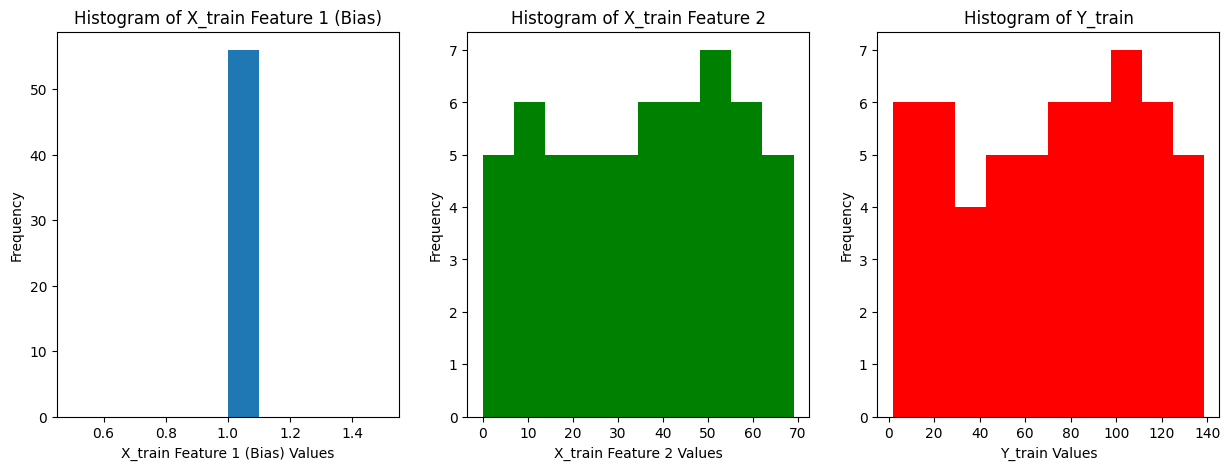

In [12]:
# YOUR CODE HERE

# Creating a figure with side-by-side subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the histogram for X_train Feature 1 (Bias)
axs[0].hist(X_train[:, 0])
axs[0].set_xlabel("X_train Feature 1 (Bias) Values")
axs[0].set_ylabel("Frequency")
axs[0].set_title("Histogram of X_train Feature 1 (Bias)")

# Plotting the histogram for X_train Feature 2
axs[1].hist(X_train[:, 1], color = "green")
axs[1].set_xlabel("X_train Feature 2 Values")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Histogram of X_train Feature 2")

# Plotting the histogram for Y_train
axs[2].hist(Y_train, color = "red")
axs[2].set_xlabel("Y_train Values")
axs[2].set_ylabel("Frequency")
axs[2].set_title("Histogram of Y_train")

# Displaying the plot
plt.show()

---
### Step 4: Modeling

Let's start by considering the two models proposed in Assignment 1:
1. $M_1(x) = 5+x$
2. $M_2(x) = 1+2x$

### <span style="color:chocolate">Exercise 4:</span> Practice with Parameters (10 points)

Perform the following computations:

1. Use matrix multiplication (np.dot) to create $M_1$ and $M_2$ (as previously defined) to produce vectors of predictions using the X_train data. Call these predictions M1_hat_train, M2_hat_train. Hint: the "learned" parameters are alredy provided to you;
3. Print the shapes of the predictions to verify that they match the shape of Y_train.

In [14]:
# YOUR CODE HERE

# Defining the model parameters
M1_param = np.array([5, 1])  # Parameters for w1 and w2 for Model 1
M2_param = np.array([1, 2])  # Parameters for w1 and w2 for Model 2

# Generating the predictions
M1_hat_train = np.dot(X_train, M1_param)
M2_hat_train = np.dot(X_train, M2_param)

print('Y_train Shape:', Y_train.shape)
print('M1_hat_train Shape:', M1_hat_train.shape)
print('M2_hat_train Shape:', M2_hat_train.shape)

Y_train Shape: (56,)
M1_hat_train Shape: (56,)
M2_hat_train Shape: (56,)


### <span style="color:chocolate">Exercise 5:</span> Learn parameters with Gradient Descent (20 points)

1. Fill in the <span style="color:green">NotImplemented</span> parts of the <span style="color:chocolate">gradient_descent()</span> function below. Hint: refer to ``02 Linear Regression_helper.ipynb file``;

2. Run this function with our artificial (X_train, Y_train) data . Set learning_rate = .0002 and num_epochs = 5. Print out the weights and loss after each epoch.

3. Generate a plot with the loss values on the y-axis and the epoch number on the x-axis for visualization. Make sure to include axes name and title.

In [15]:
def gradient_descent(inputs, outputs, learning_rate, num_epochs):
  """Apply the gradient descent algorithm to learn learn linear regression.

  Args:
    inputs: A 2-D array where each column is an input feature and each
            row is a training example.
    outputs: A 1-D array containing the real-valued
             label corresponding to the input data in the same row.
    learning_rate: The learning rate to use for updates.
    num_epochs: The number of passes through the full training data.

  Returns:
    weights: A 2-D array with the learned weights after each training epoch.
    losses: A 1-D array with the loss after each epoch.
  """
  # m = number of examples, n = number of features
  m, n = inputs.shape

  # We'll use a vector of size n to store the learned weights and initialize
  # all weights to 1.
  W = np.ones(n)

  # Keep track of the training loss and weights after each step.
  losses = []
  weights = []

  for epoch in range(num_epochs):
    # Append the old weights to the weights list to keep track of them.
    weights.append(W)

    # Evaluate the current predictions for the training examples given
    # the current estimate of W.
    predictions = np.dot(inputs, W)

    # Find the difference between the predictions and the actual target
    # values.
    diff = predictions - outputs

    # In standard linear regression, we want to minimize the sum of squared
    # differences. Compute the mean squared error loss. Don't bother with the
    # 1/2 scaling factor here.
    loss = np.mean(diff ** 2)

    # Append the loss to the losses list to keep a track of it.
    losses.append(loss)

    # Compute the gradient with respect to the loss.
    # [Formula (4) in the Gradient Descent Implementation]
    gradient = np.dot(inputs.T, diff) / m

    # Update weights, scaling the gradient by the learning rate.
    W = W - learning_rate * gradient

  return np.array(weights), np.array(losses)

Epoch 1: Weights = [1. 1.], Loss = 1665.3666608648086
Epoch 2: Weights = [1.00709394 1.33262886], Loss = 742.4148662596615
Epoch 3: Weights = [1.01183193 1.55469157], Loss = 331.0657262384294
Epoch 4: Weights = [1.01499708 1.7029404 ], Loss = 147.73208292579974
Epoch 5: Weights = [1.01711221 1.80191116], Loss = 66.0223586320446


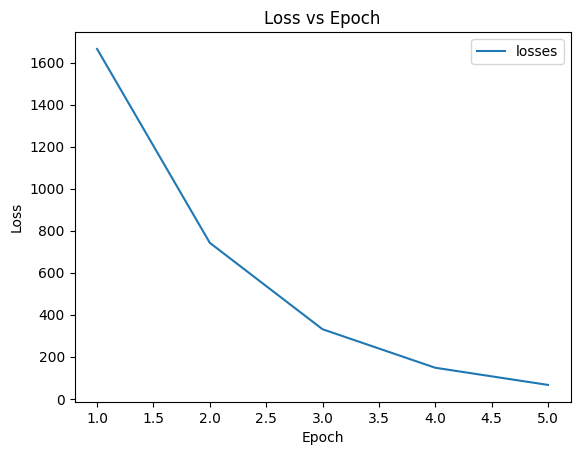

In [16]:
# YOUR CODE HERE

# Setting parameters
learning_rate = 0.0002
num_epochs = 5

# Running the function with our X_train and Y_train data
weights, losses = gradient_descent(X_train, Y_train, learning_rate, num_epochs)

for i in range(num_epochs):
    print(f"Epoch {i+1}: Weights = {weights[i]}, Loss = {losses[i]}")

# Generating a plot
plt.plot(range(1, num_epochs + 1), losses, label = 'losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.show()


---
### Step 5: Hyperparameter tuning

Hyperparameter tuning plays an important role in optimizing ML models. One systematically adjusts hyperparameters to find the right balance between model complexity and generalization, ultimately leading to better predictive performance and model effectiveness.

Note that hyperparameter tuning is typically performed on **a separate validation dataset**. However, for the purposes of this assignment and based on the ML knowledge you've acquired thus far, we will perform hyperparameter tuning directly on the training data.

### <span style="color:chocolate">Exercise 6:</span> Tuning hyperparameters (10 points)

Answer the following questions:
    
1. Do you think it would be beneficial to extend the model training in Exercise 5 by increasing the learning rate to 0.02? Justify your answer;

2. Restoring to the previous learning_rate = .0002, would you  consider extending the model training in Exercise 5 by increasing the number of epochs to 10? Justify your answer.

Note: to support your answers, we recommend the following actions:
- create side-by-side subplots to show the loss at each epoch (make sure to include axes name and title), and
- print the loss at the last epoch under the following scenarios:
    - learning_rate=.0002, num_epochs=5;
    - learning_rate=.02, num_epochs=5;
    - learning_rate=.0002, num_epochs=10.

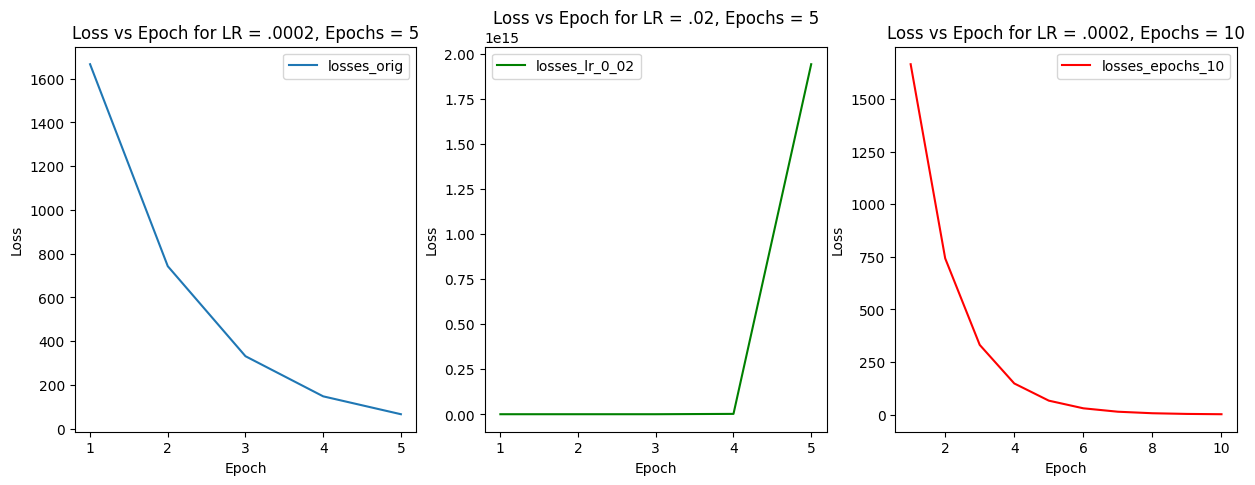

In [17]:
# YOUR CODE HERE

# 1. No, I do not think it would be beneficial to extend the model training in
# Exercise 5 by increasing the learning rate to 0.02. With the current learning
# rate of 0.0002 and after just 5 epochs, we see that we are at least somewhat
# nearing an asymptote (representing minimum loss). If we increase the learning
# rate by two orders of magnitude to 0.02, our gradient descent algorithm will
# likely diverge instead, not giving us our global minimum.

# 2. Yes, I would consider extending the model training in Exercise 5 by
# increasing the number of epochs to 10. The main concern would be that of
# overfitting and the loss of generalization. However, we from our previous
# graph that there still seems to be some improvements that can be made, and it
# shouldn't cause the model to overfit that much.

# Setting new parameters for each type
learning_rate_0_02 = 0.02
num_epochs_10 = 10

# Getting the weights and losses for our updated hyperparameters
weights_lr_0_02, losses_lr_0_02 = gradient_descent(
    X_train, Y_train, learning_rate_0_02, num_epochs)
weights_epochs_10, losses_epochs_10 = gradient_descent(
    X_train, Y_train, learning_rate, num_epochs_10)

# Creating side-by-side subplots for loss at each epoch
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotting the Loss vs Epoch for learning_rate = .0002, num_epochs = 5
axs[0].plot(range(1, num_epochs + 1), losses, label = 'losses_orig')
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].set_title("Loss vs Epoch for LR = .0002, Epochs = 5")
axs[0].legend()

# Plotting the Loss vs Epoch for learning_rate = .02, num_epochs = 5
axs[1].plot(range(1, num_epochs + 1), losses_lr_0_02, color = "green",
            label = 'losses_lr_0_02')
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].set_title("Loss vs Epoch for LR = .02, Epochs = 5")
axs[1].legend()

# Plotting the Loss vs Epoch for learning_rate = .0002, num_epochs = 10
axs[2].plot(range(1, num_epochs_10 + 1), losses_epochs_10, color = "red",
            label = 'losses_epochs_10')
axs[2].set_xlabel("Epoch")
axs[2].set_ylabel("Loss")
axs[2].set_title("Loss vs Epoch for LR = .0002, Epochs = 10")
axs[2].legend()

# Showing the plot
plt.show()

In [18]:
# Printing the loss at the last epoch under each scenario:
print("Loss at final epoch for learning rate = 0.0002, epochs = 5:", losses[-1])
print("Loss at final epoch for learning rate = 0.02, epochs = 5:",
      losses_lr_0_02[-1])
print("Loss at final epoch for learning rate = 0.0002, epochs = 10:",
      losses_epochs_10[-1])

Loss at final epoch for learning rate = 0.0002, epochs = 5: 66.0223586320446
Loss at final epoch for learning rate = 0.02, epochs = 5: 1943544404976517.2
Loss at final epoch for learning rate = 0.0002, epochs = 10: 1.479786682981072


### <span style="color:chocolate">Exercise 7:</span> Choosing the best model (10 points)

Write down the learned model that you consider most optimal given your answers to the hyperparameter tuning exercise. Call this model $M_3(x)$.

In [19]:
# YOUR ANSWER HERE

# Writing down the learned model I consider most optimal:
print('With an MSE about ~1.5, the final model with a learning rate of 0.0002')
print('10 epochs seems to be the most optimal. Therefore, I will set this')
print('model as M3:')
print(
    f'M3(x) = {weights_epochs_10[-1][0]:.2f} + {weights_epochs_10[-1][1]:.2f}x')

With an MSE about ~1.5, the final model with a learning rate of 0.0002
10 epochs seems to be the most optimal. Therefore, I will set this
model as M3:
M3(x) = 1.02 + 1.97x


---
### Step 6: Evaluation and Generalization

To evaluate our models, we assess their performance based on how closely they fit the available data. In other words, we compare the true value $y$ with the predicted value $\hat{y}$ for each $x$.

### <span style="color:chocolate">Exercise 8:</span> Computing MSE (10 points)

Assess the performance of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) by computing the MSE metric on the training dataset. Hint: you can use the <span style="color:chocolate">mean_squared_error()</span> method available in sklearn.metrics.

In [20]:
# YOUR CODE HERE

# Getting the predictions for the most optimal model
M3_hat_train = np.dot(X_train, weights_epochs_10[-1])

# Calculating the training data MSE for M1, M2, and M3
M1_MSE_train = mean_squared_error(Y_train, M1_hat_train)
M2_MSE_train = mean_squared_error(Y_train, M2_hat_train)
M3_MSE_train = mean_squared_error(Y_train, M3_hat_train)

print('MSE of Model M1:', M1_MSE_train)
print('MSE of Model M2:', M2_MSE_train)
print('MSE of Model M3:', M3_MSE_train, '\n')

# The MSE of Model M1 is significantly worse than that of the other two models.
# Thus, M1 is the least optimal model to use. Models M2 and M3 have comparable
# MSEs, with the MSE of M2 being better. This is likely due to the fact that the
# data we generated was essentially based off of the M2 model with some noise.
# However, due to how close M3 is to M2 - with M2 being the "precise" model - we
# can reasonably conclude that M3 is also a decent model, and that our gradient
# descent algorithm did its job properly.

MSE of Model M1: 1397.608983658733
MSE of Model M2: 0.3280557752885262
MSE of Model M3: 1.479786682981072 



### <span style="color:chocolate">Exercise 9:</span> Generalization (10 points)

Which of the three models ($M_1(x)$, $M_2(x)$, $M_3(x)$) demonstrates better generalization ability?

In [21]:
# YOUR CODE HERE

# Generating the predictions on the test dataset
M1_hat_test = np.dot(X_test, M1_param)
M2_hat_test = np.dot(X_test, M2_param)
M3_hat_test = np.dot(X_test, weights_epochs_10[-1])

# Calculating the test data MSE for M1, M2, and M3
M1_MSE_test = mean_squared_error(Y_test, M1_hat_test)
M2_MSE_test = mean_squared_error(Y_test, M2_hat_test)
M3_MSE_test = mean_squared_error(Y_test, M3_hat_test)

print('MSE of Model M1:', M1_MSE_test)
print('MSE of Model M2:', M2_MSE_test)
print('MSE of Model M3:', M3_MSE_test, '\n')

# Generalization ability refers to how well the model can predict previously
# unseen data (like the X_test data). Therefore, the lower the MSE for the test
# data, the better the model is at generalization. In this case, Model M1 is
# clearly not very generalizable due to how large its MSE is (especially
# compared to those of M2 or M3). Models M2 and M3, on the other hand, seem to
# be pretty generalizable, with M2 demonstrating the better generalization
# ability due to it having a lower MSE.

MSE of Model M1: 1113.6003911560044
MSE of Model M2: 0.2908006971666422
MSE of Model M3: 1.066053488198779 



----
#### <span style="color:chocolate">Additional practice question</span> (not graded)

1. How does stochastic gradient descent (SGD) differ from the gradient descent (GD) approach implemented in Exercise 5?
2. Determine the optimal weights for model $M_3(x)$ using SGD. Does SGD converge more rapidly? Explain the reasons for your answer.

In [22]:
# YOUR ANSWER HERE

# 1. Stochastic gradient descent differs from the gradient descent approach we
# implemented in that the gradient (and thus the parameters) would update after
# each, random data point is processed, rather than the entire dataset. This can
# allow convergence to occur much faster, but it can potentially run into the
# problem of introducing noise into the model, as you only have one data point
# to work off of each time.

In [23]:
# YOUR CODE HERE

# 2. Creating a function to get stochastic gradient descent algorithm:

def sgd(inputs, outputs, learning_rate, num_epochs):
  """Apply the sgd algorithm to learn learn linear regression.

  Args:
    inputs: A 2-D array where each column is an input feature and each
            row is a training example.
    outputs: A 1-D array containing the real-valued
             label corresponding to the input data in the same row.
    learning_rate: The learning rate to use for updates.
    num_epochs: The number of passes through the full training data.

  Returns:
    weights: A 2-D array with the learned weights after each training epoch.
    losses: A 1-D array with the loss after each epoch.
  """
  # m = number of examples, n = number of features
  m, n = inputs.shape

  # We'll use a vector of size n to store the learned weights and initialize
  # all weights to 1.
  W = np.ones(n)

  # Keep track of the training loss and weights after each step.
  losses = []
  weights = []

  for epoch in range(num_epochs):

    # Append the old weights to the weights list to keep track of them.
    weights.append(W)

    # Creating a random list of numbers to cycle through for the inputs/outputs
    random_indices = np.random.permutation(m)

    for i in random_indices:

      # Evaluate the current prediction for the training example i given
      # the current estimate of W.
      prediction = np.dot(inputs[i], W)

      # Find the difference between the prediction and the actual target value.
      diff = prediction - outputs[i]

      # Compute the gradient with respect to the loss.
      # [Formula (4) in the Gradient Descent Implementation]
      gradient = np.dot(inputs[i].T, diff)

      # Update weights, scaling the gradient by the learning rate.
      W = W - learning_rate * gradient

    # Compute overall prediction after running through all samples
    predictions = np.dot(inputs, W)

    # Findings the differences between all
    diffs = predictions - outputs

    # In standard linear regression, we want to minimize the sum of squared
    # differences. Compute the mean squared error loss. Don't bother with the
    # 1/2 scaling factor here.
    loss = np.mean(diffs ** 2)

    # Append the loss to the losses list to keep a track of it.
    losses.append(loss)

  return np.array(weights), np.array(losses)

Epoch 1: Weights = [1. 1.], Loss = 0.43318253822679653
Epoch 2: Weights = [1.02244303 1.99256934], Loss = 0.4561880485517741
Epoch 3: Weights = [1.0229377  1.99174317], Loss = 0.3273875719160871
Epoch 4: Weights = [1.02348782 1.99928035], Loss = 0.6880308710907954
Epoch 5: Weights = [1.02412747 2.01542367], Loss = 0.3663717888471809


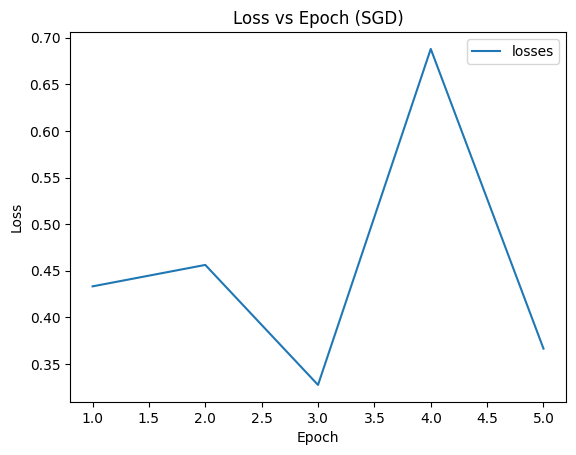

In [27]:
# Getting weights and losses for sgd
weights_sgd, losses_sgd = sgd(X_train, Y_train, learning_rate, num_epochs)

for i in range(num_epochs):
    print(f"Epoch {i+1}: Weights = {weights_sgd[i]}, Loss = {losses_sgd[i]}")

# Generating a plot
plt.plot(range(1, num_epochs + 1), losses_sgd, label = 'losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch (SGD)')
plt.legend()
plt.show()

In [26]:
# It is very clear in the example above that stochastic gradient descent will
# converge more rapidly. In fact, it is so rapid that the loss drops to its
# ultimate ending point after the first epoch. This is likely due to the fact
# that the gradient will update after every single point of data, which
# inherently gives it more data (and more time) to converge to a point. In fact,
# because it converges so quickly, each epoch thereafter introduces some error,
# as the parameters will jump back and forth between the actual value as
# gradient descent takes the numbers down. To fix this, we can try lowering the
# learning rate as show in the next example:

Epoch 1: Weights = [1. 1.], Loss = 251.50826457812153
Epoch 2: Weights = [1.01307472 1.61201552], Loss = 38.40703441038959
Epoch 3: Weights = [1.01828201 1.84934426], Loss = 6.064011748807928
Epoch 4: Weights = [1.0202957  1.94192927], Loss = 1.1872252950879658
Epoch 5: Weights = [1.02108671 1.97790193], Loss = 0.4643578094925429


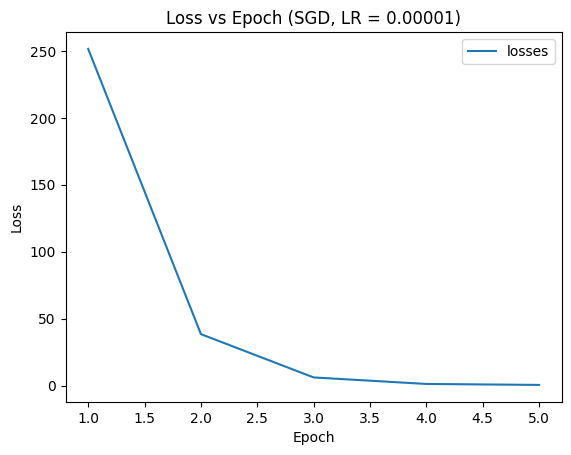

In [32]:
# Setting learning rate to be even smaller (20x smaller than before)
learning_rate_sgd = 0.00001

# Getting weights and losses for sgd with even smaller learning rate (lrs)
weights_sgd_lrs, losses_sgd_lrs = sgd(
    X_train, Y_train, learning_rate_sgd, num_epochs)

for i in range(num_epochs):
    print(f"Epoch {i+1}: Weights = {weights_sgd_lrs[i]}, "
    f"Loss = {losses_sgd_lrs[i]}")

# Generating a plot
plt.plot(range(1, num_epochs + 1), losses_sgd_lrs, label = 'losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch (SGD, LR = 0.00001)')
plt.legend()
plt.show()

In [33]:
# Now, we see that even with a learning rate 20x smaller than our original one,
# we still get convergence relatively quickly. We see here that our weights do
# in fact converge to the "true" parameters, and that they show what we expect
# in terms of minimizing the loss.